## Student: Deng, Zixuan (V00971633)

# Problem 1

In [1]:
# This should be roughly the content of the first code cell
import pandas as pd
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

In [2]:
# Plotting support
from matplotlib import pyplot as plt
from plotnine import *
# Standard libraries
import pandas as pd
import sklearn as sk

## 1 Bad data

In [3]:
original_df = pd.read_csv('https://raw.githubusercontent.com/kkehoe1985/ga_data_science_final_project/master/combined_data.csv',header=0) 
df = pd.read_csv('https://raw.githubusercontent.com/kkehoe1985/ga_data_science_final_project/master/combined_data.csv',header=0) 
df.head()

,fips,votes,"Percent of adults with less than a high school diploma, 2011-2015","Percent of adults with a high school diploma only, 2011-2015","Percent of adults completing some college or associate's degree, 2011-2015","Percent of adults with a bachelor's degree or higher, 2011-2015",Unemployment_rate_2015,POP_ESTIMATE_2015,Amish,Buddhist,Catholic,Christian Generic,Eastern Orthodox,Hindu,Jewish,Mainline Christian,Mormon,Muslim,Non-Catholic Christian,Other,Other Christian,Other Misc,Pentecostal / Charismatic,Protestant Denomination,Zoroastrian,MedHHInc2014,PerCapitaInc,PovertyUnder18Pct2014,PovertyAllAgesPct2014,Deep_Pov_All,Deep_Pov_Children,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units,age_total_pop,0-4_rate,5-9_rate,10-14_rate,15-19_rate,20-24_rate,25-29_rate,30-34_rate,35-39_rate,40-44_rate,45-49_rate,50-54_rate,55-59_rate,60-64_rate,65-69_rate,70-74_rate,75-79_rate,80-84_rate,85+_rate,TOT_MALE_rate,TOT_FEMALE_rate,WHITE_MALE_rate,WHITE_FEMALE_rate,BLACK_MALE_rate,BLACK_FEMALE_rate,NATIVE_AMERICAN_MALE_rate,NATIVE_AMERICAN_FEMALE_rate,ASIAN_MALE_rate,ASIAN_FEMALE_rate,HAWAIIAN_PACIFIC_MALE_rate,HAWAIIAN_PACIFIC_FEMALE_rate,MULTI_MALE_rate,MULTI_FEMALE_rate,WHITE_rate,BLACK_rate,NATIVE_AMERICAN_rate,HAWAIIAN_PACIFIC_rate,MULTI_rate,voter_turnout_rate,Democrat
0,2013,7471,18.3,39.4,28.2,14.0,3.2,3341.0,0,0,190,42,0,0,0,0,0,0,42,2,0,193,0,0,0,55462.0,27122.0,15.6,16.2,4.933009,2.459016,3141,747,15009.86,8027.92,6981.94,0.4,0.1,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,2.236157,0
1,2016,7471,16.0,37.0,32.2,14.7,3.8,5702.0,0,0,202,56,0,0,0,14,19,0,0,20,0,177,1,0,0,68387.0,32700.0,9.7,9.9,4.287817,4.505495,5561,1929,14116.44,9726.16,4390.28,1.3,0.4,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,1.310242,0
2,2020,7471,7.0,24.1,35.6,33.2,5.0,298695.0,0,13,165,200,0,0,1,47,47,3,38,69,16,68,22,6,0,75200.0,36508.0,14.2,10.0,3.903225,4.874349,291826,113032,1961.00,256.32,1704.68,171.2,66.3,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,0.025012,0
3,2050,7471,21.0,43.6,23.7,11.6,14.4,17946.0,0,0,549,167,0,0,0,2,10,0,0,11,0,306,11,1,0,45808.0,18875.0,31.7,23.8,8.644846,10.329777,17013,5919,45504.21,4934.20,40570.00,0.4,0.1,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,0.416304,0
4,2060,7471,8.0,30.7,41.3,20.0,9.2,892.0,0,0,347,6,0,0,0,0,0,0,6,1,0,227,0,0,0,75364.0,37012.0,12.2,9.5,4.868154,3.816794,997,969,887.56,383.72,503.84,2.0,1.9,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,8.375561,0


In [4]:
#df.iloc[14,31] # view the cell 
#type(df.iloc[15,31]) # view the cell data type. string or other type. 

#df[df.stack().str.contains("<bound method Series.mean").unstack().any(1)] alternative way to get row contains "<bound method Series.mean"
count = 0
# use for loop to get the cell directly. 
for i in range(df.shape[0]): #iterate over rows
    for j in range(df.shape[1]): #iterate over columns
        value = df.iloc[i, j] #get cell value
        if type(value) == str:
          if "<bound method Series.mean" in value: 
            #print(value)
            count += 1
            df.iat[i,j] = 0
            #print(df.iloc[i,j])
print(count)

5


In [5]:
df.iloc[14,31] # test if the cell value changed successfully. 

0

## 2 Split
when string convert to integer, "0" will disappear. Therefore, for codes that have only 4-digits, it needs to add 0 at the begining of code. 


In [6]:
df.iloc[:,0] = df.iloc[:,0].astype(str)
 
for i in range(df.shape[0]): 
  if len(df.iloc[i,0])==4:
    df.iloc[i,0] = "0"+ df.iloc[i,0]
df['fips']

0       02013
1       02016
2       02020
3       02050
4       02060
        ...  
3140    56037
3141    56039
3142    56041
3143    56043
3144    56045
Name: fips, Length: 3145, dtype: object

In [7]:
state_list = []
County_list = []
for i in range(df.shape[0]): 
    state = df.iloc[i,0][:2]
    County = df.iloc[i,0][2:]
    state_list.append(state)
    County_list.append(County)

df['State'] = state_list
df['County'] = County_list

In [8]:
df['County']

0       013
1       016
2       020
3       050
4       060
       ... 
3140    037
3141    039
3142    041
3143    043
3144    045
Name: County, Length: 3145, dtype: object

In [9]:
df.head()

,fips,votes,"Percent of adults with less than a high school diploma, 2011-2015","Percent of adults with a high school diploma only, 2011-2015","Percent of adults completing some college or associate's degree, 2011-2015","Percent of adults with a bachelor's degree or higher, 2011-2015",Unemployment_rate_2015,POP_ESTIMATE_2015,Amish,Buddhist,Catholic,Christian Generic,Eastern Orthodox,Hindu,Jewish,Mainline Christian,Mormon,Muslim,Non-Catholic Christian,Other,Other Christian,Other Misc,Pentecostal / Charismatic,Protestant Denomination,Zoroastrian,MedHHInc2014,PerCapitaInc,PovertyUnder18Pct2014,PovertyAllAgesPct2014,Deep_Pov_All,Deep_Pov_Children,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units,age_total_pop,0-4_rate,5-9_rate,10-14_rate,15-19_rate,20-24_rate,25-29_rate,30-34_rate,35-39_rate,40-44_rate,45-49_rate,50-54_rate,55-59_rate,60-64_rate,65-69_rate,70-74_rate,75-79_rate,80-84_rate,85+_rate,TOT_MALE_rate,TOT_FEMALE_rate,WHITE_MALE_rate,WHITE_FEMALE_rate,BLACK_MALE_rate,BLACK_FEMALE_rate,NATIVE_AMERICAN_MALE_rate,NATIVE_AMERICAN_FEMALE_rate,ASIAN_MALE_rate,ASIAN_FEMALE_rate,HAWAIIAN_PACIFIC_MALE_rate,HAWAIIAN_PACIFIC_FEMALE_rate,MULTI_MALE_rate,MULTI_FEMALE_rate,WHITE_rate,BLACK_rate,NATIVE_AMERICAN_rate,HAWAIIAN_PACIFIC_rate,MULTI_rate,voter_turnout_rate,Democrat,State,County
0,02013,7471,18.3,39.4,28.2,14.0,3.2,3341.0,0,0,190,42,0,0,0,0,0,0,42,2,0,193,0,0,0,55462.0,27122.0,15.6,16.2,4.933009,2.459016,3141,747,15009.86,8027.92,6981.94,0.4,0.1,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,2.236157,0,02,013
1,02016,7471,16.0,37.0,32.2,14.7,3.8,5702.0,0,0,202,56,0,0,0,14,19,0,0,20,0,177,1,0,0,68387.0,32700.0,9.7,9.9,4.287817,4.505495,5561,1929,14116.44,9726.16,4390.28,1.3,0.4,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,1.310242,0,02,016
2,02020,7471,7.0,24.1,35.6,33.2,5.0,298695.0,0,13,165,200,0,0,1,47,47,3,38,69,16,68,22,6,0,75200.0,36508.0,14.2,10.0,3.903225,4.874349,291826,113032,1961.00,256.32,1704.68,171.2,66.3,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,0.025012,0,02,020
3,02050,7471,21.0,43.6,23.7,11.6,14.4,17946.0,0,0,549,167,0,0,0,2,10,0,0,11,0,306,11,1,0,45808.0,18875.0,31.7,23.8,8.644846,10.329777,17013,5919,45504.21,4934.20,40570.00,0.4,0.1,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,0.416304,0,02,050
4,02060,7471,8.0,30.7,41.3,20.0,9.2,892.0,0,0,347,6,0,0,0,0,0,0,6,1,0,227,0,0,0,75364.0,37012.0,12.2,9.5,4.868154,3.816794,997,969,887.56,383.72,503.84,2.0,1.9,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.00

## 3 Aggregate

### Aggregate all education-related features into a single categorical feature Education.

In [10]:
#df.head()

edu = [] # will fill in element in the order less_high_school, high_school, some_college, bachelor
edu_value = []
for i in range(df.shape[0]): #iterate over rows
    for j in range(2,6): #iterate over columns 2 to 5

        edu.append(df.iloc[i,j])
        max_value = max(edu)
        max_index = edu.index(max_value)

    if max_index == 0:
      edu_value.append('less than a high school diploma')
    elif max_index == 1: 
      edu_value.append('only high school diploma')
    elif max_index == 2: 
      edu_value.append("some college or associate's degree")        
    else:
      edu_value.append("a bachelor's degree or higher")

    edu.clear()
        
df['Education'] = edu_value
#df.head()

### Aggregate all religion-based features into a single categorical feature Religion.

religion-based features: 
Amish	Buddhist	Catholic	Christian Generic	Eastern Orthodox	Hindu	Jewish	Mainline Christian	Mormon	Muslim	Non-Catholic Christian	Other	Other Christian	Other Misc Pentecostal / Charismatic 
Protestant Denomination	Zoroastrian

\\
from Column index 8 to 24.

In [11]:
religion_feature = [] # will fill in element in the order less_high_school, high_school, some_college, bachelor
religion_value = []
for i in range(df.shape[0]): #iterate over rows
    for j in range(8,25): #17

        religion_feature.append(df.iloc[i,j])
        max_value = max(religion_feature)
        max_index = religion_feature.index(max_value)

    if max_index == 0:
      religion_value.append('Amish')
    elif max_index == 1: 
      religion_value.append('Buddhist')
    elif max_index == 2: 
      religion_value.append("Catholic")  
    elif max_index == 3: 
      religion_value.append("Christian Generic")  
    elif max_index == 4: 
      religion_value.append("Eastern Orthodox")  
    elif max_index == 5: 
      religion_value.append("Hindu")  
    elif max_index == 6: 
      religion_value.append("Jewish")  
    elif max_index == 7: 
      religion_value.append("Mainline Christian")  
    elif max_index == 8: 
      religion_value.append("Mormon")  
    elif max_index == 9: 
      religion_value.append("Muslim")  
    elif max_index == 10: 
      religion_value.append("Non-Catholic Christian")  
    elif max_index == 11: 
      religion_value.append("Other")  
    elif max_index == 12: 
      religion_value.append("Other Christian")  
    elif max_index == 13: 
      religion_value.append("Other Misc")  
    elif max_index == 14: 
      religion_value.append("Pentecostal / Charismatic")  
    elif max_index == 15: 
      religion_value.append("Protestant Denomination")  
    else:
      religion_value.append("Zoroastrian")

    religion_feature.clear()
        
df['Religion'] = religion_value

### Aggregate all age-related features into three numerical features: Old (anybody over 65 years of age), Young (anybody under 19), and Adult (the rest, obviously).

old >= 65
\
Young <= 18
\
Adult 19 < age < 65

In [12]:
young_value = []

adult_value = []

old_value = []

young = 0 
adult = 0
old = 0

#df.columns.get_loc('85+_rate')

for i in range(df.shape[0]): #iterate over rows
    young = df.iloc[i,39] + df.iloc[i,40] + df.iloc[i,41] + df.iloc[i,42] 
    adult = df.iloc[i,43] + df.iloc[i,44] + df.iloc[i,45] + df.iloc[i,46] + df.iloc[i,47] + df.iloc[i,48] + df.iloc[i,49] + df.iloc[i,50] + df.iloc[i,51]
    old = df.iloc[i,52] + df.iloc[i,53] + df.iloc[i,54] + df.iloc[i,55] + df.iloc[i,56] 

    young_value.append(young)
    adult_value.append(adult)
    old_value.append(old)
    # max_value = max(age)
    # max_index = age.index(max_value)

    # if max_index == 0:
    #   age_value.append('Young')
    # elif max_index == 1: 
    #   age_value.append('Adult')       
    # else:
    #   age_value.append("Old")
    young = 0
    adult = 0
    old = 0
        
df['Young'] = young_value
df['Adult'] = adult_value
df['Old'] = old_value


df.head()

,fips,votes,"Percent of adults with less than a high school diploma, 2011-2015","Percent of adults with a high school diploma only, 2011-2015","Percent of adults completing some college or associate's degree, 2011-2015","Percent of adults with a bachelor's degree or higher, 2011-2015",Unemployment_rate_2015,POP_ESTIMATE_2015,Amish,Buddhist,Catholic,Christian Generic,Eastern Orthodox,Hindu,Jewish,Mainline Christian,Mormon,Muslim,Non-Catholic Christian,Other,Other Christian,Other Misc,Pentecostal / Charismatic,Protestant Denomination,Zoroastrian,MedHHInc2014,PerCapitaInc,PovertyUnder18Pct2014,PovertyAllAgesPct2014,Deep_Pov_All,Deep_Pov_Children,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units,age_total_pop,0-4_rate,...,30-34_rate,35-39_rate,40-44_rate,45-49_rate,50-54_rate,55-59_rate,60-64_rate,65-69_rate,70-74_rate,75-79_rate,80-84_rate,85+_rate,TOT_MALE_rate,TOT_FEMALE_rate,WHITE_MALE_rate,WHITE_FEMALE_rate,BLACK_MALE_rate,BLACK_FEMALE_rate,NATIVE_AMERICAN_MALE_rate,NATIVE_AMERICAN_FEMALE_rate,ASIAN_MALE_rate,ASIAN_FEMALE_rate,HAWAIIAN_PACIFIC_MALE_rate,HAWAIIAN_PACIFIC_FEMALE_rate,MULTI_MALE_rate,MULTI_FEMALE_rate,WHITE_rate,BLACK_rate,NATIVE_AMERICAN_rate,HAWAIIAN_PACIFIC_rate,MULTI_rate,voter_turnout_rate,Democrat,State,County,Education,Religion,Young,Adult,Old
0,02013,7471,18.3,39.4,28.2,14.0,3.2,3341.0,0,0,190,42,0,0,0,0,0,0,42,2,0,193,0,0,0,55462.0,27122.0,15.6,16.2,4.933009,2.459016,3141,747,15009.86,8027.92,6981.94,0.4,0.1,1143123.501,0.06075,...,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,2.236157,0,02,013,only high school diploma,Other Misc,0.25037,0.584595,0.096915
1,02016,7471,16.0,37.0,32.2,14.7,3.8,5702.0,0,0,202,56,0,0,0,14,19,0,0,20,0,177,1,0,0,68387.0,32700.0,9.7,9.9,4.287817,4.505495,5561,1929,14116.44,9726.16,4390.28,1.3,0.4,1143123.501,0.06075,...,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,1.310242,0,02,016,only high school diploma,Catholic,0.25037,0.584595,0.096915
2,02020,7471,7.0,24.1,35.6,33.2,5.0,298695.0,0,13,165,200,0,0,1,47,47,3,38,69,16,68,22,6,0,75200.0,36508.0,14.2,10.0,3.903225,4.874349,291826,113032,1961.00,256.32,1704.68,171.2,66.3,1143123.501,0.06075,...,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,0.025012,0,02,020,some college or associate's degree,Christian Generic,0.25037,0.584595,0.096915
3,02050,7471,21.0,43.6,23.7,11.6,14.4,17946.0,0,0,549,167,0,0,0,2,10,0,0,11,0,306,11,1,0,45808.0,18875.0,31.7,23.8,8.644846,10.329777,17013,5919,45504.21,4934.20,40570.00,0.4,0.1,1143123.501,0.06075,...,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,0.416304,0,02,050,only high school diploma,Catholic,0.25037,0.584595,0.096915
4,02060,7471,8.0,30.7,41.3,20.0,9.2,892.0,0,0,347,6,0,0,0,0,0,0,6,1,0,227,0,0,0,75364.0,37012.0,12.2,9.5,4.868154,3.816794,997,969,887.56,383.72,503.84,2.0,1.9,1143123.501,0.06075,...,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131

### Aggregate different ethnic and racial groups into a single EthnicMale and EthnicFemale categorical features in the same way you did with the education-related features.

In [13]:
#df.columns.get_loc('TOT_MALE_rate')  # 57
#df.columns.get_loc('MULTI_FEMALE_rate')  # 70


male_feature = [] 
male_value = []
female_feature = [] 
female_value = []

for i in range(df.shape[0]): #iterate over rows

    male_feature.extend([df.iloc[i,59],df.iloc[i,61],df.iloc[i,63],df.iloc[i,65],df.iloc[i,67],df.iloc[i,69]])
    max_value_1 = max(male_feature)
    max_index_1 = male_feature.index(max_value_1)

    female_feature.extend([df.iloc[i,60],df.iloc[i,62],df.iloc[i,64],df.iloc[i,66],df.iloc[i,68],df.iloc[i,70]])
    max_value_2 = max(female_feature)
    max_index_2 = female_feature.index(max_value_2)

   
    if max_index_1 == 0: 
      male_value.append('White Male')
    elif max_index == 1: 
      male_value.append("Black Male")  
    elif max_index == 2: 
      male_value.append("Native American Male")  
    elif max_index == 3: 
      male_value.append("Asian Male")  
    elif max_index == 4: 
      male_value.append("Hawaiian Pacific Male")  
    elif max_index == 5: 
      male_value.append("Multi Male")  




   
    if max_index_2 == 0: 
      female_value.append("White Female")  
    elif max_index_2 == 1: 
      female_value.append("Black Female")  
    elif max_index_2 == 2: 
      female_value.append("Native American Female")  
    elif max_index_2 == 3: 
      female_value.append("Asian Female")  
    elif max_index_2 == 4: 
      female_value.append("Hawaiian Pacific Female")  
    else:
      female_value.append("Multi Female")
    
    
    male_feature.clear()
    female_feature.clear()
        
df['EthnicMale'] = male_value
df['EthnicFemale'] = female_value


In [14]:
# drop unnecessary columns after aggregation. 
df.drop(df.columns[[0,2,3,4,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,59,60,61,62,63,64,65,66,67,68,69,70]], axis = 1, inplace = True)
df.head()

,votes,Unemployment_rate_2015,POP_ESTIMATE_2015,MedHHInc2014,PerCapitaInc,PovertyUnder18Pct2014,PovertyAllAgesPct2014,Deep_Pov_All,Deep_Pov_Children,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units,age_total_pop,TOT_MALE_rate,TOT_FEMALE_rate,WHITE_rate,BLACK_rate,NATIVE_AMERICAN_rate,HAWAIIAN_PACIFIC_rate,MULTI_rate,voter_turnout_rate,Democrat,State,County,Education,Religion,Young,Adult,Old,EthnicMale,EthnicFemale
0,7471,3.2,3341.0,55462.0,27122.0,15.6,16.2,4.933009,2.459016,3141,747,15009.86,8027.92,6981.94,0.4,0.1,1143123.501,0.4831,0.498326,0.75751,0.129665,0.011954,0.002299,0.012374,2.236157,0,02,013,only high school diploma,Other Misc,0.25037,0.584595,0.096915,White Male,White Female
1,7471,3.8,5702.0,68387.0,32700.0,9.7,9.9,4.287817,4.505495,5561,1929,14116.44,9726.16,4390.28,1.3,0.4,1143123.501,0.4831,0.498326,0.75751,0.129665,0.011954,0.002299,0.012374,1.310242,0,02,016,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
2,7471,5.0,298695.0,75200.0,36508.0,14.2,10.0,3.903225,4.874349,291826,113032,1961.00,256.32,1704.68,171.2,66.3,1143123.501,0.4831,0.498326,0.75751,0.129665,0.011954,0.002299,0.012374,0.025012,0,02,020,some college or associate's degree,Christian Generic,0.25037,0.584595,0.096915,White Male,White Female
3,7471,14.4,17946.0,45808.0,18875.0,31.7,23.8,8.644846,10.329777,17013,5919,45504.21,4934.20,40570.00,0.4,0.1,1143123.501,0.4831,0.498326,0.75751,0.129665,0.011954,0.002299,0.012374,0.416304,0,02,050,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
4,7471,9.2,892.0,75364.0,37012.0,12.2,9.5,4.868154,3.816794,997,969,887.56,383.72,503.84,2.0,1.9,1143123.501,0.4831,0.498326,0.75751,0.129665,0.011954,0.002299,0.012374,8.375561,0,02,060,some college or associate's degree,Catholic,0.25037,0.584595,0.096915,White Male,White Female


In [15]:
df.drop(df.columns[[19,20,21,22,23]], axis = 1, inplace = True)
df.head()

,votes,Unemployment_rate_2015,POP_ESTIMATE_2015,MedHHInc2014,PerCapitaInc,PovertyUnder18Pct2014,PovertyAllAgesPct2014,Deep_Pov_All,Deep_Pov_Children,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units,age_total_pop,TOT_MALE_rate,TOT_FEMALE_rate,voter_turnout_rate,Democrat,State,County,Education,Religion,Young,Adult,Old,EthnicMale,EthnicFemale
0,7471,3.2,3341.0,55462.0,27122.0,15.6,16.2,4.933009,2.459016,3141,747,15009.86,8027.92,6981.94,0.4,0.1,1143123.501,0.4831,0.498326,2.236157,0,02,013,only high school diploma,Other Misc,0.25037,0.584595,0.096915,White Male,White Female
1,7471,3.8,5702.0,68387.0,32700.0,9.7,9.9,4.287817,4.505495,5561,1929,14116.44,9726.16,4390.28,1.3,0.4,1143123.501,0.4831,0.498326,1.310242,0,02,016,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
2,7471,5.0,298695.0,75200.0,36508.0,14.2,10.0,3.903225,4.874349,291826,113032,1961.00,256.32,1704.68,171.2,66.3,1143123.501,0.4831,0.498326,0.025012,0,02,020,some college or associate's degree,Christian Generic,0.25037,0.584595,0.096915,White Male,White Female
3,7471,14.4,17946.0,45808.0,18875.0,31.7,23.8,8.644846,10.329777,17013,5919,45504.21,4934.20,40570.00,0.4,0.1,1143123.501,0.4831,0.498326,0.416304,0,02,050,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
4,7471,9.2,892.0,75364.0,37012.0,12.2,9.5,4.868154,3.816794,997,969,887.56,383.72,503.84,2.0,1.9,1143123.501,0.4831,0.498326,8.375561,0,02,060,some college or associate's degree,Catholic,0.25037,0.584595,0.096915,White Male,White Female


In [16]:
# df.drop(df.columns[[18,19]], axis = 1, inplace = True)
# df.head()

### Remove the following features: PovertyUnder18Pct2014, Deep_Pov_Children, Housing units, Area in square miles - Water area, Area in square miles - Land area,Density per square mile of land area - Housing units, and age total pop.

In [17]:
df.drop('PovertyUnder18Pct2014', inplace=True, axis=1)
df.drop('Deep_Pov_Children', inplace=True, axis=1)
df.drop('Housing units', inplace=True, axis=1)
df.drop('Area in square miles - Water area', inplace=True, axis=1)
df.drop('Area in square miles - Land area', inplace=True, axis=1)
df.drop('Density per square mile of land area - Housing units', inplace=True, axis=1)
df.drop('age_total_pop', inplace=True, axis=1)

df.head()

,votes,Unemployment_rate_2015,POP_ESTIMATE_2015,MedHHInc2014,PerCapitaInc,PovertyAllAgesPct2014,Deep_Pov_All,Population,Area in square miles - Total area,Density per square mile of land area - Population,TOT_MALE_rate,TOT_FEMALE_rate,voter_turnout_rate,Democrat,State,County,Education,Religion,Young,Adult,Old,EthnicMale,EthnicFemale
0,7471,3.2,3341.0,55462.0,27122.0,16.2,4.933009,3141,15009.86,0.4,0.4831,0.498326,2.236157,0,02,013,only high school diploma,Other Misc,0.25037,0.584595,0.096915,White Male,White Female
1,7471,3.8,5702.0,68387.0,32700.0,9.9,4.287817,5561,14116.44,1.3,0.4831,0.498326,1.310242,0,02,016,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
2,7471,5.0,298695.0,75200.0,36508.0,10.0,3.903225,291826,1961.00,171.2,0.4831,0.498326,0.025012,0,02,020,some college or associate's degree,Christian Generic,0.25037,0.584595,0.096915,White Male,White Female
3,7471,14.4,17946.0,45808.0,18875.0,23.8,8.644846,17013,45504.21,0.4,0.4831,0.498326,0.416304,0,02,050,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
4,7471,9.2,892.0,75364.0,37012.0,9.5,4.868154,997,887.56,2.0,0.4831,0.498326,8.375561,0,02,060,some college or associate's degree,Catholic,0.25037,0.584595,0.096915,White Male,White Female


In [18]:
df.shape

(3145, 23)

## 4 Rename


fips	votes	Unemployment_rate_2015	POP_ESTIMATE_2015	MedHHInc2014	PerCapitaInc	PovertyAllAgesPct2014	Deep_Pov_All	Population	Housing units	Area in square miles - Total area	Area in square miles - Water area	Area in square miles - Land area	Density per square mile of land area - Population	Density per square mile of land area - Housing units	age_total_pop	WHITE_rate	BLACK_rate	NATIVE_AMERICAN_rate	HAWAIIAN_PACIFIC_rate	MULTI_rate	voter_turnout_rate	Democrat	State	County	Education	Religion	Age_Group	EthnicMale	EthnicFemale

In [19]:
list_of_name = ["Votes","UnemploymentRate","PopEstimate2015","HouseholdIncome","PerCapitaIncome","PovertyLevel","DeepPovertyLevel","Population","Area", "PopDensity", "MaleRate","FemaleRate","Turnout","Democrat","State","County", "Education", "Religion", "Young","Adult","Old","EthnicMale","EthnicFemale"]
df.columns = list_of_name

In [20]:
df.head()
# df.shape

,Votes,UnemploymentRate,PopEstimate2015,HouseholdIncome,PerCapitaIncome,PovertyLevel,DeepPovertyLevel,Population,Area,PopDensity,MaleRate,FemaleRate,Turnout,Democrat,State,County,Education,Religion,Young,Adult,Old,EthnicMale,EthnicFemale
0,7471,3.2,3341.0,55462.0,27122.0,16.2,4.933009,3141,15009.86,0.4,0.4831,0.498326,2.236157,0,02,013,only high school diploma,Other Misc,0.25037,0.584595,0.096915,White Male,White Female
1,7471,3.8,5702.0,68387.0,32700.0,9.9,4.287817,5561,14116.44,1.3,0.4831,0.498326,1.310242,0,02,016,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
2,7471,5.0,298695.0,75200.0,36508.0,10.0,3.903225,291826,1961.00,171.2,0.4831,0.498326,0.025012,0,02,020,some college or associate's degree,Christian Generic,0.25037,0.584595,0.096915,White Male,White Female
3,7471,14.4,17946.0,45808.0,18875.0,23.8,8.644846,17013,45504.21,0.4,0.4831,0.498326,0.416304,0,02,050,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
4,7471,9.2,892.0,75364.0,37012.0,9.5,4.868154,997,887.56,2.0,0.4831,0.498326,8.375561,0,02,060,some college or associate's degree,Catholic,0.25037,0.584595,0.096915,White Male,White Female


## 5 Normalize

I think the income-related features are MedHHInc2014(Median Household Income) and PerCapitaInc(Per Capita Income)
\
Area-related feature is TotalAreaSqM
\
polulation-related features are PopulationDensitySqM, Population

VoterTurnoutRate, UnemploymentRate2015, PovertyAllAgesPct2014

In [21]:
def z_score_normalization(df):
   return ((df - df.mean())/df.std(ddof=0))
# transfer object to int. 
df['Population'] = df['Population'].astype("int32")

df['PerCapitaIncome'] = z_score_normalization(df['PerCapitaIncome'])
df['HouseholdIncome'] = z_score_normalization(df['HouseholdIncome'])

df['Area']=z_score_normalization(df['Area'])
df['PopDensity'] = z_score_normalization(df['PopDensity'])
df['Population'] = z_score_normalization(df['Population'])
df['PopEstimate2015']= z_score_normalization(df['PopEstimate2015'])

In [22]:
df['Turnout'] = df['Turnout']/100
df['UnemploymentRate'] = df['UnemploymentRate']/100
df['PovertyLevel'] = df['PovertyLevel']/100
df['DeepPovertyLevel']= df['DeepPovertyLevel']/100

In [23]:
df.head()

,Votes,UnemploymentRate,PopEstimate2015,HouseholdIncome,PerCapitaIncome,PovertyLevel,DeepPovertyLevel,Population,Area,PopDensity,MaleRate,FemaleRate,Turnout,Democrat,State,County,Education,Religion,Young,Adult,Old,EthnicMale,EthnicFemale
0,7471,0.032,-0.302990,0.687669,0.536632,0.162,0.049330,-0.303817,3.607604,-0.151766,0.4831,0.498326,0.022362,0,02,013,only high school diploma,Other Misc,0.25037,0.584595,0.096915,White Male,White Female
1,7471,0.038,-0.295860,1.756284,1.515032,0.099,0.042878,-0.296080,3.374070,-0.151244,0.4831,0.498326,0.013102,0,02,016,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
2,7471,0.050,0.588905,2.319570,2.182969,0.100,0.039032,0.619196,0.196708,-0.052741,0.4831,0.498326,0.000250,0,02,020,some college or associate's degree,Christian Generic,0.25037,0.584595,0.096915,White Male,White Female
3,7471,0.144,-0.258886,-0.110505,-0.909921,0.238,0.086448,-0.259464,11.578651,-0.151766,0.4831,0.498326,0.004163,0,02,050,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
4,7471,0.092,-0.310385,2.333129,2.271372,0.095,0.048682,-0.310672,-0.083883,-0.150838,0.4831,0.498326,0.083756,0,02,060,some college or associate's degree,Catholic,0.25037,0.584595,0.096915,White Male,White Female


## 6 Summary


### New name, mean and standard deviation of POP ESTIMATE 2015, Population

In [24]:
print("mean is" , np.mean(df['PopEstimate2015']))
print("standard deviation is" , np.std(df['PopEstimate2015']))

mean is -3.6360245321587e-18
standard deviation is 0.9999999999999993


In [25]:
# transfer object to int. 
#df['Population'] = df['Population'].astype("int32")
print("mean is" , np.mean(df['Population']))
print("standard deviation is" , np.std(df['Population']))

mean is -3.41009679423816e-17
standard deviation is 0.9999999999999978


In [26]:
np.corrcoef(df['PopEstimate2015'], df['Population'])

array([[1.        , 0.99155914],
       [0.99155914, 1.        ]])

Since the correlation score above 0.9 , drop `'PopEstimate2015'`


In [27]:
df.drop('PopEstimate2015', inplace=True, axis=1)

In [28]:
df.head()

,Votes,UnemploymentRate,HouseholdIncome,PerCapitaIncome,PovertyLevel,DeepPovertyLevel,Population,Area,PopDensity,MaleRate,FemaleRate,Turnout,Democrat,State,County,Education,Religion,Young,Adult,Old,EthnicMale,EthnicFemale
0,7471,0.032,0.687669,0.536632,0.162,0.049330,-0.303817,3.607604,-0.151766,0.4831,0.498326,0.022362,0,02,013,only high school diploma,Other Misc,0.25037,0.584595,0.096915,White Male,White Female
1,7471,0.038,1.756284,1.515032,0.099,0.042878,-0.296080,3.374070,-0.151244,0.4831,0.498326,0.013102,0,02,016,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
2,7471,0.050,2.319570,2.182969,0.100,0.039032,0.619196,0.196708,-0.052741,0.4831,0.498326,0.000250,0,02,020,some college or associate's degree,Christian Generic,0.25037,0.584595,0.096915,White Male,White Female
3,7471,0.144,-0.110505,-0.909921,0.238,0.086448,-0.259464,11.578651,-0.151766,0.4831,0.498326,0.004163,0,02,050,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
4,7471,0.092,2.333129,2.271372,0.095,0.048682,-0.310672,-0.083883,-0.150838,0.4831,0.498326,0.083756,0,02,060,some college or associate's degree,Catholic,0.25037,0.584595,0.096915,White Male,White Female


### New name, median, quartiles, and IQR of PerCapitaInc and PovertyAllAgesPct2014 features

#### PerCapitaInc Feature 

In [29]:
# Q1 
print("Q1 is" , np.quantile(df['PerCapitaIncome'], 0))
# Q2 median
print("Q2/median is", np.quantile(df['PerCapitaIncome'], 0.5))
# Q3 
print("Q3 is" , np.quantile(df['PerCapitaIncome'], 1))
# IQR
print("IQR is" , np.quantile(df['PerCapitaIncome'], 1)-np.quantile(df['PerCapitaIncome'], 0))

Q1 is -2.7823525085347547
Q2/median is -0.11920182388759241
Q3 is 6.9367530329458
IQR is 9.719105541480555


#### PovertyAllAgesPct2014 features

In [30]:
# Q1
print("Q1 is" , np.quantile(df['PovertyLevel'], 0))
# Q2 median
print("Q2/median is", np.quantile(df['PovertyLevel'], 0.5))
# Q3 
print("Q3 is" , np.quantile(df['PovertyLevel'], 1))
# IQR
print("IQR is" , np.quantile(df['PovertyLevel'], 1)-np.quantile(df['PovertyLevel'], 0))


Q1 is 0.032
Q2/median is 0.158
Q3 is 0.474
IQR is 0.44199999999999995


### Mode of combined Religion and EthnicMale feature

In [31]:
print("Mode of Religion feature is" , df['Religion'].value_counts())

Mode of Religion feature is Christian Generic    2073
Catholic             1012
Mormon                 31
Other                  24
Amish                   3
Other Misc              2
Name: Religion, dtype: int64


In [32]:
df['EthnicMale'].value_counts()

White Male    3025
Asian Male     120
Name: EthnicMale, dtype: int64

In [33]:
print(df['Religion'].mode())

0    Christian Generic
dtype: object


In [34]:
df['EthnicMale'].mode()

0    White Male
dtype: object

Mode of Religion is **Christian Generic**, Mode of EthnicMale is **White Male**.




## 7 Visualize

### histogram of the following features: Religion, EthnicMale, EthnicFemale, Education

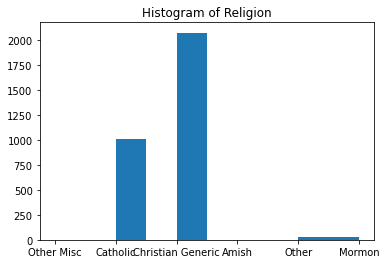

In [35]:
plt.hist(df['Religion'])
plt.title("Histogram of Religion")
plt.show() 

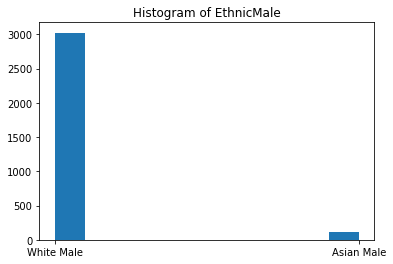

In [36]:
plt.hist(df['EthnicMale'])
plt.title("Histogram of EthnicMale")
plt.show() 

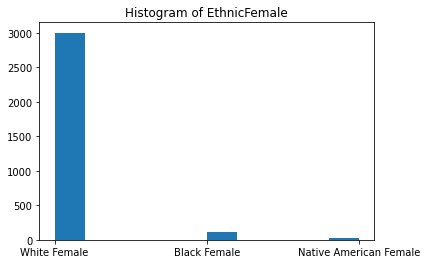

In [37]:
plt.hist(df['EthnicFemale'])
plt.title("Histogram of EthnicFemale")
plt.show() 

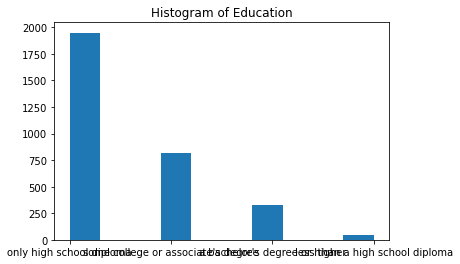

In [38]:
plt.hist(df['Education'])
plt.title("Histogram of Education")
plt.show() 

### 2D scatter plot of Area and Population features

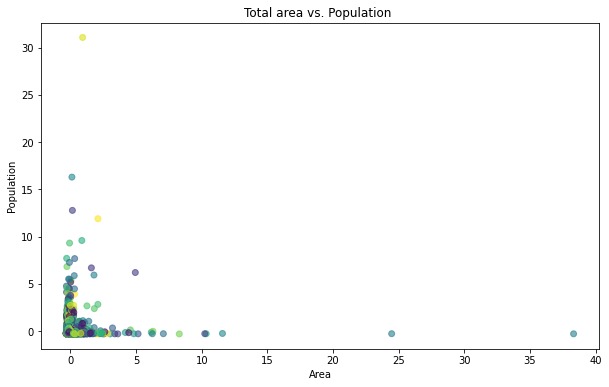

In [39]:
# ref: https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.10-Scatter-Plots/

colors = np.random.rand(3145)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=df['Area'], y=df['Population'],c=colors, alpha=0.6)
plt.xlabel("Area")
plt.ylabel("Population")
ax.set_title('Total area vs. Population ')
plt.show()

### Box plot of normalized PerCapitaInc and PovertyAllAgesPct2014 features

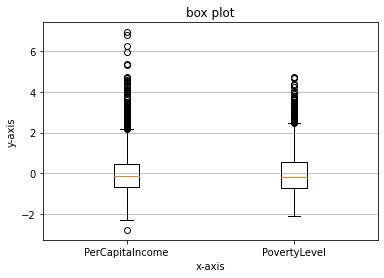

In [40]:
# ref: https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.09-Box-Plots-and-Violin-Plots/

fig, ax = plt.subplots()

# build a box plot # z-score normalization.
ax.boxplot([df['PerCapitaIncome'],z_score_normalization(df['PovertyLevel'])])


# title and axis labels
ax.set_title('box plot')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels=['PerCapitaIncome', 'PovertyLevel']
ax.set_xticklabels(xticklabels)


# add horizontal grid lines
ax.yaxis.grid(True)


# show the plot
plt.show()

## 8 Conflict

In [41]:
df.head()

,Votes,UnemploymentRate,HouseholdIncome,PerCapitaIncome,PovertyLevel,DeepPovertyLevel,Population,Area,PopDensity,MaleRate,FemaleRate,Turnout,Democrat,State,County,Education,Religion,Young,Adult,Old,EthnicMale,EthnicFemale
0,7471,0.032,0.687669,0.536632,0.162,0.049330,-0.303817,3.607604,-0.151766,0.4831,0.498326,0.022362,0,02,013,only high school diploma,Other Misc,0.25037,0.584595,0.096915,White Male,White Female
1,7471,0.038,1.756284,1.515032,0.099,0.042878,-0.296080,3.374070,-0.151244,0.4831,0.498326,0.013102,0,02,016,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
2,7471,0.050,2.319570,2.182969,0.100,0.039032,0.619196,0.196708,-0.052741,0.4831,0.498326,0.000250,0,02,020,some college or associate's degree,Christian Generic,0.25037,0.584595,0.096915,White Male,White Female
3,7471,0.144,-0.110505,-0.909921,0.238,0.086448,-0.259464,11.578651,-0.151766,0.4831,0.498326,0.004163,0,02,050,only high school diploma,Catholic,0.25037,0.584595,0.096915,White Male,White Female
4,7471,0.092,2.333129,2.271372,0.095,0.048682,-0.310672,-0.083883,-0.150838,0.4831,0.498326,0.083756,0,02,060,some college or associate's degree,Catholic,0.25037,0.584595,0.096915,White Male,White Female


In [ ]:
def detect_outliers(df):
    count = 0
    for i in range(df.shape[1]):
        q1, q3= np.percentile(df.iloc[:,i],[25,75])
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr) 
        for j in range(df.shape[0]):
            if df.iloc[j,i] > upper_bound or df..iloc[j,i] > lower_bound:
                count +=1 
    return count


Some data that are outliers, and we will drop it because the data pattern will change a lot by those outliers. 

## 9 Labels

I think the label vector should be "Votes". We can use this dataset to predict the vote for US Presidential Elections. All other features such as unemploymentrate, population, education etc. can be features to predict the votes. 

But when we consider the problem as classification, I think "Democrat" will be the label vector. It's a categortical feature, other features can be used to help classify democrat. 

In [42]:
df.to_csv('elections_clean.csv', index= False)